In [1]:
## Phylogenetics with Biotite
# it is the study of the evolutionary history and relationships among individuals or groups of organisms

In [2]:
import biotite.sequence.phylo as phylo

In [3]:
dir(phylo)

['Tree',
 'TreeError',
 'TreeNode',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'as_binary',
 'neighbor_joining',
 'nj',
 'tree',
 'upgma']

In [20]:
# The reference objects
fruits = ['Apple','Pear','Orange','Lemon','Banana']

# Create nodes
apple = phylo.TreeNode(index=fruits.index('Apple'))
pear = phylo.TreeNode(index=fruits.index('Pear'))
orange = phylo.TreeNode(index=fruits.index('Orange'))
lemon = phylo.TreeNode(index=fruits.index('Lemon'))
banana = phylo.TreeNode(index=fruits.index('Banana'))
intermediate1 = phylo.TreeNode(
    children=(apple, pear), distances=(2.0, 2.0)
)
intermediate2 = phylo.TreeNode((orange, lemon), (1.0 , 1.0))
intermediate3 = phylo.TreeNode((intermediate2, banana), (2.0 , 3.0))
root = phylo.TreeNode((intermediate1, intermediate3), (2.0 , 1.0))

In [22]:
# Create tree from root node 
tree = phylo.Tree(root=root)

# Trees can be converted into Newick notation
print('Tree:',tree.to_newick(labels=fruits))

# Distances can be omitted
print(
    'Tree w/o distances:',
    tree.to_newick(labels=fruits, include_distance=False)
)

# Distances can be measured
distance = tree.get_distance(fruits.index('Apple'), fruits.index('Banana'))
print('distance Apple-Banana:', distance)

Tree: ((Apple:2.0,Pear:2.0):2.0,((Orange:1.0,Lemon:1.0):2.0,Banana:3.0):1.0):0.0;
Tree w/o distances: ((Apple,Pear),((Orange,Lemon),Banana));
distance Apple-Banana: 8.0


In [23]:
distance

8.0

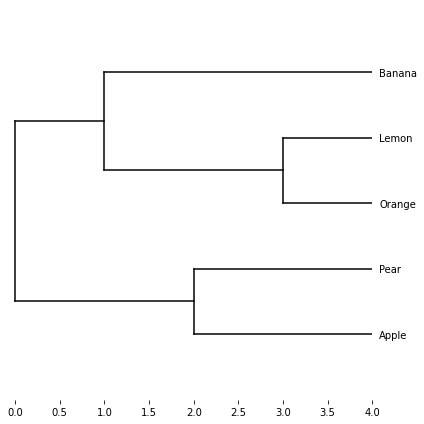

In [27]:
# Plot a phylo tree
import matplotlib.pylab as plt
import biotite.sequence.graphics as graphics
fig, ax = plt.subplots(figsize=(6.0, 6.0))
graphics.plot_dendrogram(ax, tree, labels=fruits)
fig.tight_layout()